# Práctica 1: primeras pruebas con TensorFlow y Keras

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, pantalones y camisetas. No hay problema sino entiendes todos los detalles.
Para empezar, tendrás que instalar la librería de TensorFlow (Keras está incluída dentro de esta):

In [1]:
# Instalar TensorFlow
# pip install tensorflow

In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aquí:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a><br/>&nbsp;
  </td></tr>
</table>

Moda MNIST esta construida como un reemplazo para el set de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) 
casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para clasificación de imágenes. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aquí.

60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar las clasificaciones de la misma. Podéis acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Al cargar el set de datos retorna cuatro arrays en NumPy:

* Los arrays `train_images` y `train_labels` son los arrays que la red utilizará para aprender.
* La red se probará contra los conjuntos de test `test_images`, y `test_labels`.

Las imagenes son arrays de NumPy de 28x28 pixels, con valores de pixel que varian de 0 a 255. Los *labels* son un array de integers, que van del 0 al 9. Estos corresponden a la clase de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, lo almacenamos aquí para usarlos luego cuando se visualicen las imagenes:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploramos el set de datos

Exploramos el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [5]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [6]:
len(train_labels)

60000

Cada etiqueta es un entero entre 0 y 9:

In [7]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [8]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [9]:
len(test_labels)

10000

## Pre-procese el set de datos

El set de datos debe ser pre-procesado antes de entrenar la red. Si inspeccionamos la primera imagen en el set de entrenamiento, veremos que los valores de los pixeles estan entre 0 y 255 (escala de grises):

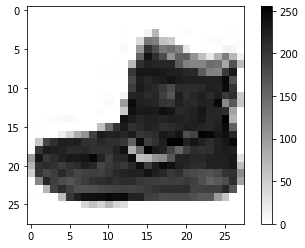

In [10]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

Como hemos mencionado alguna vez, es preferible que los valores de los pixels estén entre 0 y 1. Por ello, escalaremos estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, dividimos los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

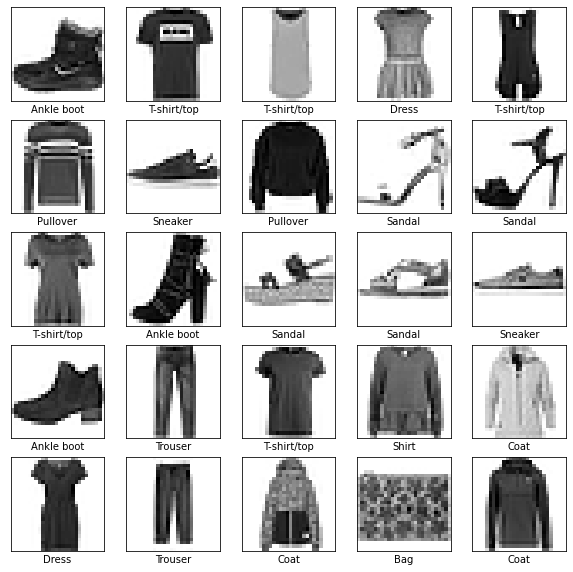

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayor del aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas serán como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [13]:
model = keras.Sequential([
    # Primera capa
    keras.layers.Flatten(input_shape=(28, 28)),
    # Capas ocultas totalmente conectadas con la capa anterior.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un array uni dimensional (de 28*28 pixeles = 784 pixeles). Observa esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consta de dos capas`tf.keras.layers.Dense`. Estas estan completamente o "Densamente" conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un array de 10 probabilidades que suman 1. Cada nodo contiene una calificación que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compilamos el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* — Hace referencia a la función de coste utilizada durante el entrenamiento. El objetivo es minimizar esta funcion.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de coste. Es lo que para nuestra red era el descenso del gradiente.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de test.
El siguiente ejemplo usa *accuracy* (exactitud, acierto) , la fraccion de las imagenes que son correctamente clasificadas.

In [14]:
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Pasar los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arrays `train_images` y `train_labels`.
2. El modelo aprende a asociar imagenes y etiquetas.
3. Pedimos al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verificamos que las predicciones sean iguales a las etiquetas de el array`test_labels`.

Para comenzar a entrenar, llamamos al método `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.4930 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.3725 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.3373 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.3126 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2930 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.2802 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.2674 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.2596 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.2481 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 2s 899u

A medida que el modelo entrena, la perdida y la exactitud son mostradas. Este modelo alcanza una exactitud de 0.91 (o 91%) sobre el set de datos de entrenamiento.

## Evaluar Exactitud

Siguente, comparamos el rendimiento del modelo sobre el set de datos de test:

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3294 - accuracy: 0.8831 - 296ms/epoch - 946us/step

Test accuracy: 0.8830999732017517


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## Hacer predicciones

Con el modelo entrenado podemos usarlo para hacer predicciones sobre imágenes.

In [17]:
predictions = model.predict(test_images)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [18]:
predictions[0]

array([2.6568504e-08, 6.2880452e-09, 1.9161246e-10, 1.4948462e-10,
       1.1263688e-07, 2.9046044e-03, 2.6946125e-07, 1.4933426e-02,
       2.7059345e-06, 9.8215884e-01], dtype=float32)

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Podemos revisar cual tiene el nivel mas alto de confianza:

In [19]:
np.argmax(predictions[0])

9

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [20]:
test_labels[0]

9

Utilizaremos estas funciones para poder ver todo el set de la prediccion de las 10 clases:

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

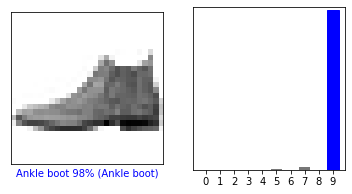

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

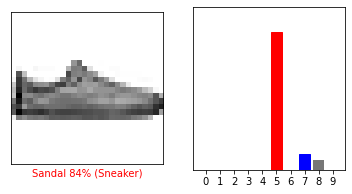

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a mostrar los gráficos de multiples imágenes con sus predicciones. Hay que destacar que el modelo puede estar equivocado aun cuando tiene mucha confianza.

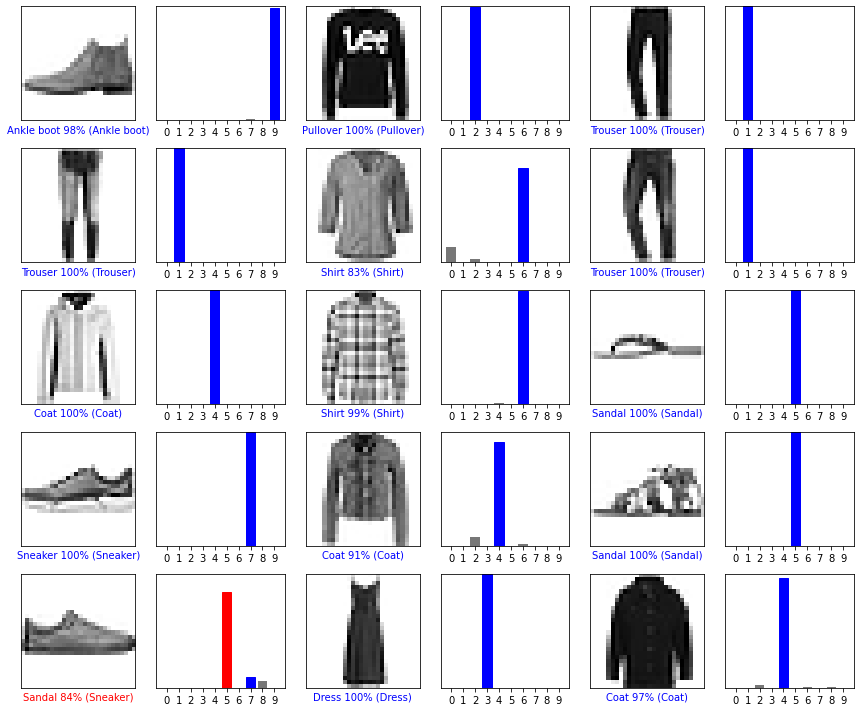

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, o coleciones de ejemplos por vez.
De acuerdo a esto, aunque usemos una única imagen toca agregarla a una lista:

In [26]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Ahora predecimos la etiqueta correcta para esta imagen:

In [27]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.6237738e-05 1.2125564e-15 9.9876189e-01 3.2244263e-10 5.1125506e-04
  5.1740131e-12 7.1068387e-04 6.2385725e-13 1.0407260e-10 1.3422857e-14]]


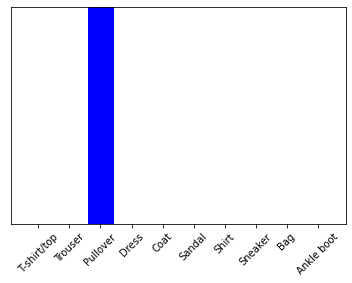

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tomamos la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [29]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.